In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import lmfit
import corner

In [2]:
#Define Hubble parameter.I am using Barboza & Alcaniz parametrization: w(z)=w0+w1*z*(1+z)/1+z^2 
def Hz1(z1,H01,Om1,w0,w1):
    #the redshift dependence of the dark energy density using Barboza & Alcaniz parametrization:
    I=((1+z1)**(3*(1+w0)))*((1+z1**2))**(3*w1/2)
    E = np.sqrt((Om1*(1+z1)**3.) + (1-Om1)*I)
    HZ1 = H01*E
    return HZ1

In [3]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01, 10., num=num_zs)

In [4]:
O_m=0.3029
w_0=-0.9414
w_1=-2.
H_0=68.5265

In [5]:
#Hubble comoving parameter
Hz=Hz1(zs,H_0,O_m,w_0,w_1)/(1+zs)

In [6]:
#random error for Hz
error_sigma = 0.5
e1 = np.random.normal(0., error_sigma, Hz.shape)

In [7]:
H_zz= Hz + e1

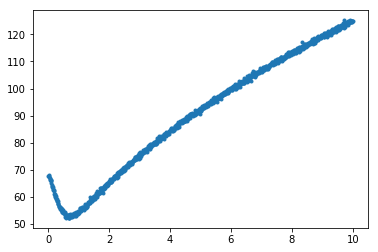

In [8]:
plt.plot(zs,H_zz, '.')

In [9]:
p = lmfit.Parameters()
p.add_many(('Om1',0.3,True,0.,2.),
           ('H01',70.,True,50.,100.),
           ('w0',-1.,True,-3.,3.),
           ('w1',-2.,True,-3.,3.))

def residual(p):
    v = p.valuesdict()
    return (Hz1(zs,v['H01'],v['Om1'],v['w0'],v['w1'])/(1+zs)-H_zz)/error_sigma

In [10]:
mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 1000
    # variables        = 4
    chi-square         = 982.330200
    reduced chi-square = 0.98627530
    Akaike info crit   = -9.82777460
    Bayesian info crit = 9.80324652
[[Variables]]
    Om1:  0.30106809 +/- 0.00200351 (0.67%) (init = 0.3)
    H01:  68.7460368 +/- 0.22791803 (0.33%) (init = 70)
    w0:  -0.96083689 +/- 0.02868461 (2.99%) (init = -1)
    w1:  -1.92553293 +/- 0.08223656 (4.27%) (init = -2)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om1, H01) = -0.999
    C(w0, w1)   = -0.921
    C(Om1, w0)  =  0.843
    C(H01, w0)  = -0.843
    C(Om1, w1)  = -0.665
    C(H01, w1)  =  0.661


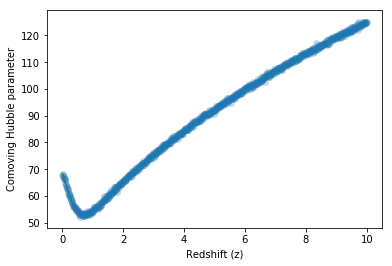

In [11]:
plt.errorbar(zs,H_zz,yerr=error_sigma,fmt='o',alpha=0.2)
#bestOde1= mi.params.valuesdict()['Ode1']
bestOm1 = mi.params.valuesdict()['Om1']
bestH01 = mi.params.valuesdict()['H01']
bestw0 = mi.params.valuesdict()['w0']
bestw1 = mi.params.valuesdict()['w1']
plt.plot(zs,Hz1(zs,bestH01,bestOm1,bestw0,bestw1)/(1+zs))
plt.plot(zs,Hz)
plt.xlabel('Redshift (z)')
plt.ylabel('Comoving Hubble parameter')
lmfit.report_fit(mi)

In [ ]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500, thin=1,
                         params=p, is_weighted=True)

In [ ]:
corner.corner(res.flatchain,labels=res.var_names, truths=list(res.params.valuesdict().values()))